In [6]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Data Source:https://www.kaggle.com/datasets/sarahquesnelle/canada-data
Temperature_DF = pd.read_csv("Resources/Canada_Temperature_Data.csv")

Temperature_DF2 = Temperature_DF.loc[(Temperature_DF["Year"] >= 1989) & (Temperature_DF["Year"] <= 2020), :]

Prov_DF = Temperature_DF2.loc[Temperature_DF2["Prov"].isin(["ON", "AB", "QC"]), :]

Prov_DF2 = Prov_DF.drop("Stn_Name", axis=1)

Prov_DF2


# Prov_DF2.to_csv("Canada_Temperature_Data2.csv", index=False)

,Year,Month,Prov,Tm,S,P
941030,1989,1,AB,-10.4,27.0,35.5
941031,1989,1,AB,-11.1,24.0,28.0
941032,1989,1,AB,-12.8,37.5,43.5
941033,1989,1,AB,-9.1,36.0,54.0
941034,1989,1,AB,-12.9,20.2,23.2
...,...,...,...,...,...,...
1357243,2017,9,QC,13.5,0.0,62.4
1357244,2017,9,QC,14.5,0.0,83.8
1357245,2017,9,QC,14.1,0.0,52.2
1357246,2017,9,QC,9.3,0.0,76.4


In [8]:
Canada_Temperature_DF = pd.read_csv("Resources/Canada_Temperature_Data2.csv")


Canada_Temperature_DF['Year'] = Canada_Temperature_DF['Year'].astype(str)


Canada_Temperature_DF


,Year,Month,Seasons,Province,Average Temperature,Average Snowfall Recorded,Average Precipitation Recorded
0,1989,1,Winter,AB,-10.4,27.0,35.5
1,1989,1,Winter,AB,-11.1,24.0,28.0
2,1989,1,Winter,AB,-12.8,37.5,43.5
3,1989,1,Winter,AB,-9.1,36.0,54.0
4,1989,1,Winter,AB,-12.9,20.2,23.2
...,...,...,...,...,...,...,...
182176,2017,9,Summer,QC,13.5,0.0,62.4
182177,2017,9,Summer,QC,14.5,0.0,83.8
182178,2017,9,Summer,QC,14.1,0.0,52.2
182179,2017,9,Summer,QC,9.3,0.0,76.4


In [9]:
# group by year, season, and province
grouped = Canada_Temperature_DF.groupby(['Year', 'Seasons', 'Province'])

# calculate summary statistics
summary_stats = grouped.agg({'Average Temperature': ['mean', 'median', 'std', 'var', 'sem'],
                             'Average Snowfall Recorded': ['mean', 'median', 'std', 'var', 'sem'],
                             'Average Precipitation Recorded': ['mean', 'median', 'std', 'var', 'sem']})

# flatten multi-level column names
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# reset index
summary_stats = summary_stats.reset_index()


Prov_ON = summary_stats.loc[summary_stats["Province"].isin(["ON"]), :]
Prov_AB = summary_stats.loc[summary_stats["Province"].isin(["AB"]), :]
Prov_QC = summary_stats.loc[summary_stats["Province"].isin(["QC"]), :]

# print summary statistics by year, season, and province
Prov_AB

,Year,Seasons,Province,Average Temperature_mean,Average Temperature_median,Average Temperature_std,Average Temperature_var,Average Temperature_sem,Average Snowfall Recorded_mean,Average Snowfall Recorded_median,Average Snowfall Recorded_std,Average Snowfall Recorded_var,Average Snowfall Recorded_sem,Average Precipitation Recorded_mean,Average Precipitation Recorded_median,Average Precipitation Recorded_std,Average Precipitation Recorded_var,Average Precipitation Recorded_sem
0,1989,Autumn,AB,-2.162500,-3.00,5.608096,31.450740,0.230491,16.755574,14.35,14.862403,220.891035,0.610841,24.153209,20.25,17.958315,322.501073,0.738082
3,1989,Spring,AB,9.460788,9.70,4.161009,17.313996,0.134017,8.308506,0.00,15.529925,241.178578,0.500185,52.799585,51.65,35.653233,1271.153001,1.148313
6,1989,Summer,AB,14.207393,14.90,3.297703,10.874845,0.104230,0.482617,0.00,2.877443,8.279678,0.090947,76.194805,63.60,50.524358,2552.710733,1.596922
9,1989,Winter,AB,-11.405893,-11.30,3.722552,13.857396,0.154972,23.591161,18.80,20.179522,407.213099,0.840084,23.662565,18.60,20.693364,428.215298,0.861476
12,1990,Autumn,AB,-5.906480,-6.40,7.690955,59.150782,0.321856,28.298599,23.00,23.482191,551.413296,0.982699,30.960946,25.00,26.411063,697.544244,1.105269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2016,Winter,AB,-3.481915,-2.60,4.868131,23.698702,0.502109,12.204255,10.65,10.291628,105.917616,1.061500,12.642553,11.30,9.469390,89.669353,0.976693
336,2017,Autumn,AB,-3.464516,-6.05,6.531189,42.656425,0.829462,18.233871,14.80,16.498911,272.214080,2.095364,23.887097,24.85,15.785514,249.182454,2.004762
339,2017,Spring,AB,10.230769,12.10,5.202671,27.067788,0.645312,9.041538,0.00,17.605955,309.969654,2.183750,59.453846,61.20,26.259469,689.559712,3.257086
342,2017,Summer,AB,15.566667,16.30,3.034798,9.210000,0.382349,0.542857,0.00,2.509962,6.299908,0.316225,42.257143,33.00,30.641726,938.915392,3.860495


In [10]:
#locate AB winter 
AB_winter_group = Prov_AB.loc[Prov_AB["Seasons"] == "Winter"]
AB_winter_group

,Year,Seasons,Province,Average Temperature_mean,Average Temperature_median,Average Temperature_std,Average Temperature_var,Average Temperature_sem,Average Snowfall Recorded_mean,Average Snowfall Recorded_median,Average Snowfall Recorded_std,Average Snowfall Recorded_var,Average Snowfall Recorded_sem,Average Precipitation Recorded_mean,Average Precipitation Recorded_median,Average Precipitation Recorded_std,Average Precipitation Recorded_var,Average Precipitation Recorded_sem
9,1989,Winter,AB,-11.405893,-11.30,3.722552,13.857396,0.154972,23.591161,18.80,20.179522,407.213099,0.840084,23.662565,18.60,20.693364,428.215298,0.861476
21,1990,Winter,AB,-6.661111,-7.30,5.152625,26.549546,0.214693,20.470486,17.00,16.054233,257.738397,0.668926,20.272743,17.00,15.713434,246.912004,0.654726
33,1991,Winter,AB,-6.239543,-5.40,5.111514,26.127571,0.214286,16.247803,12.80,12.913223,166.751338,0.541350,17.131810,14.00,13.370546,178.771504,0.560522
45,1992,Winter,AB,-2.987770,-2.65,4.649607,21.618841,0.197187,14.981115,11.80,12.975154,168.354616,0.550269,15.292446,12.45,12.910265,166.674934,0.547517
57,1993,Winter,AB,-8.417025,-9.40,5.824046,33.919512,0.246552,16.139068,11.00,16.075732,258.429171,0.680540,16.456631,11.00,15.858094,251.479157,0.671327
69,1994,Winter,AB,-10.415118,-13.50,8.537111,72.882271,0.364355,31.039526,21.40,28.719076,824.785351,1.225700,30.615847,21.00,28.300350,800.909803,1.207829
81,1995,Winter,AB,-7.931947,-7.60,4.215050,17.766648,0.183263,11.051418,8.40,10.148304,102.988071,0.441231,12.587902,9.60,11.520884,132.730762,0.500908
93,1996,Winter,AB,-12.141650,-10.20,6.220470,38.694246,0.275717,22.041847,18.00,16.782641,281.657045,0.743877,22.487623,18.80,16.938658,286.918134,0.750793
105,1997,Winter,AB,-9.062121,-7.35,5.633891,31.740726,0.245184,21.841477,17.45,19.798654,391.986682,0.861626,22.240720,18.40,19.984643,399.385948,0.869720
117,1998,Winter,AB,-8.309202,-5.70,6.298938,39.676616,0.284848,18.578528,13.00,21.982508,483.230665,0.994083,18.871984,13.00,22.646752,512.875382,1.024122


In [11]:
#get the average of the coldest winter temp for AB
Coldest_winter_AB = AB_winter_group['Average Temperature_mean'].min()
Coldest_winter_AB

-12.141650294695483

In [12]:
#get the average of the hotteset summer temp for AB
AB_summer_group = Prov_AB.loc[Prov_AB["Seasons"] == "Summer"]
Hottest_summer_AB = AB_summer_group['Average Temperature_mean'].max()
Hottest_summer_AB

16.26153846153846

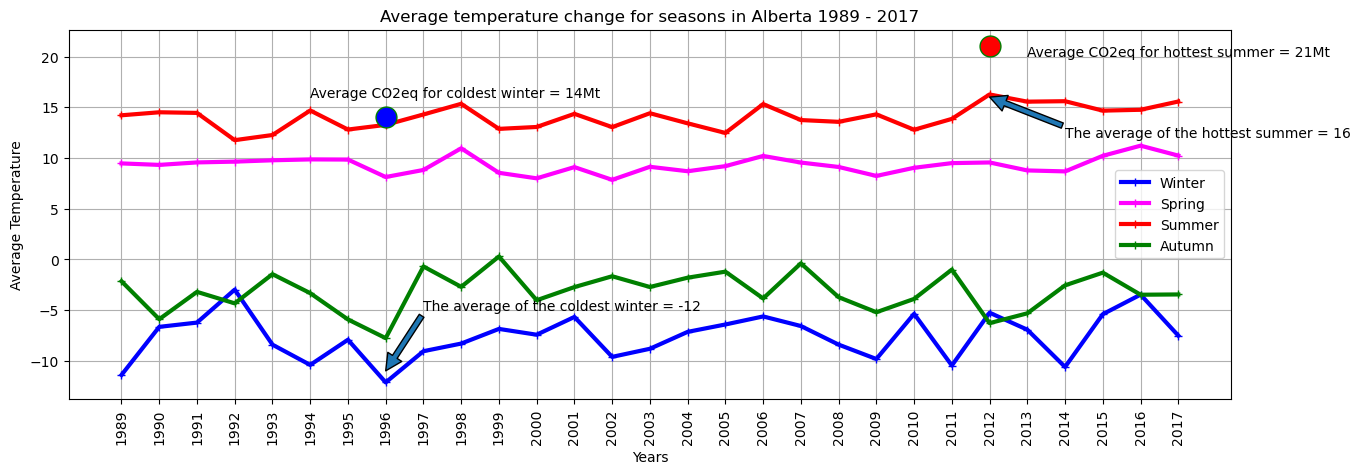

In [37]:
#locate the seasons for AB
AB_winter_group = Prov_AB.loc[Prov_AB["Seasons"] == "Winter"]
AB_spring_group = Prov_AB.loc[Prov_AB["Seasons"] == "Spring"]
AB_summer_group = Prov_AB.loc[Prov_AB["Seasons"] == "Summer"]
AB_autumn_group = Prov_AB.loc[Prov_AB["Seasons"] == "Autumn"]


#AB line grapgh 
x_AB_w = [7]
y_AB_w = [14]
x_AB_s = [23]
y_AB_s = [21]
plt.figure().set_figwidth(15)
plt.annotate('The average of the coldest winter = -12',xy=(7,-11),xytext=(8,-5),arrowprops={})
plt.annotate('The average of the hottest summer = 16',xy=(23,16),xytext=(25,12),arrowprops={})
AB_winter = plt.plot(AB_winter_group["Year"],AB_winter_group ["Average Temperature_mean"] , marker="+",color="blue", linewidth=3, label = "Winter" )
AB_spring = plt.plot(AB_spring_group["Year"],AB_spring_group ["Average Temperature_mean"] , marker="+",color="magenta", linewidth=3, label = "Spring")
AB_summer = plt.plot(AB_summer_group["Year"],AB_summer_group ["Average Temperature_mean"] , marker="+",color="red", linewidth=3, label = "Summer")
AB_autumn = plt.plot(AB_autumn_group["Year"],AB_autumn_group ["Average Temperature_mean"] , marker="+",color="green", linewidth=3, label = "Autumn")
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title("Average temperature change for seasons in Alberta 1989 - 2017")
plt.xticks(rotation=90)
plt.legend(loc = 0)
plt.grid()
plt.plot(x_AB_w, y_AB_w, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="blue")
plt.plot(x_AB_s, y_AB_s, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="red")
plt.text(5,16,'Average CO2eq for coldest winter = 14Mt')
plt.text(24,20,'Average CO2eq for hottest summer = 21Mt')
plt.show()

In [14]:
#locate winter temp for ON and get the average of coldest winter 
ON_winter_group = Prov_ON.loc[Prov_ON["Seasons"] == "Winter"]
Coldest_winter_ON = ON_winter_group['Average Temperature_mean'].min()
Coldest_winter_ON

-10.081531531531532

In [15]:
#locate summer for ON and get the average of coldest winter 
ON_summer_group = Prov_ON.loc[Prov_ON["Seasons"] == "Summer"]
Hottest_summer_ON = ON_summer_group['Average Temperature_mean'].max()
Hottest_summer_ON

20.277319587628867

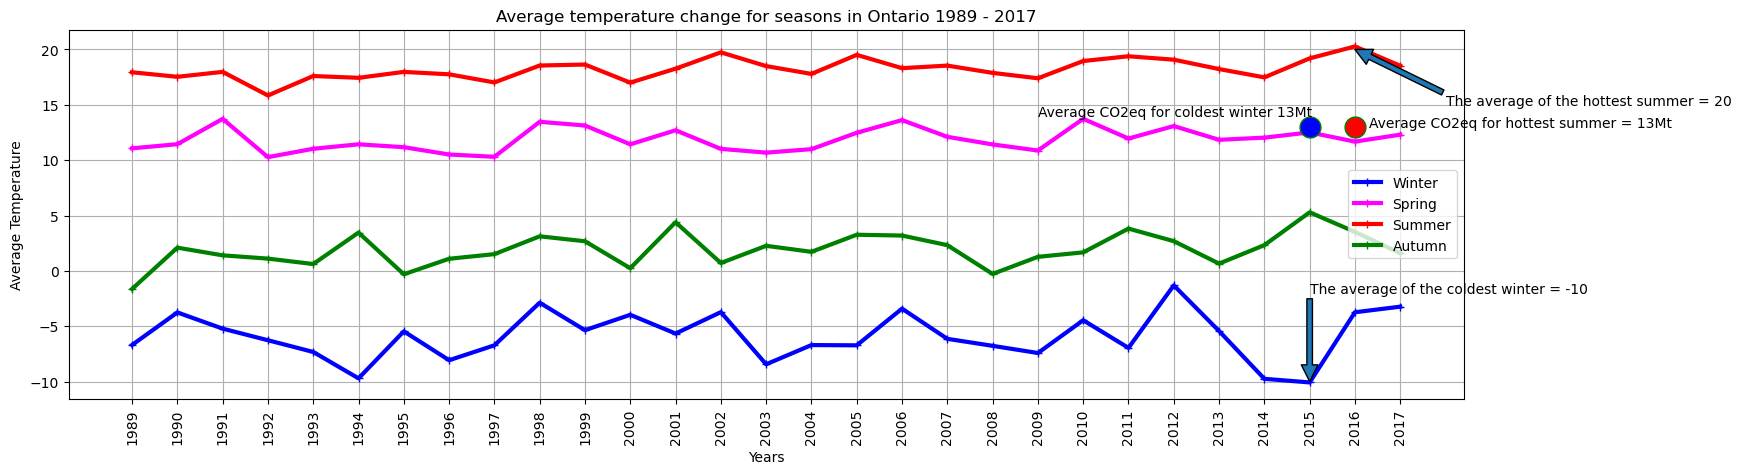

In [40]:
#locate the seasons for ON
ON_autumn_group = Prov_ON.loc[Prov_ON["Seasons"] == "Autumn"]
ON_spring_group = Prov_ON.loc[Prov_ON["Seasons"] == "Spring"]
ON_winter_group = Prov_ON.loc[Prov_ON["Seasons"] == "Winter"]
ON_summer_group = Prov_ON.loc[Prov_ON["Seasons"] == "Summer"]


#ON line grapgh 
x_ON_w = [26]
y_ON_w = [13]
x_ON_s = [27]
y_ON_s = [13]
plt.figure().set_figwidth(18)
plt.annotate('The average of the coldest winter = -10',xy=(26,-10),xytext=(26,-2),arrowprops={})
plt.annotate('The average of the hottest summer = 20',xy=(27,20),xytext=(29,15),arrowprops={})
ON_winter = plt.plot(ON_winter_group["Year"],ON_winter_group ["Average Temperature_mean"] , marker="+",color="blue", linewidth=3, label = "Winter" )
ON_spring = plt.plot(ON_spring_group["Year"],ON_spring_group ["Average Temperature_mean"] , marker="+",color="magenta", linewidth=3, label = "Spring")
ON_summer = plt.plot(ON_summer_group["Year"],ON_summer_group ["Average Temperature_mean"] , marker="+",color="red", linewidth=3, label = "Summer")
ON_autumn = plt.plot(ON_autumn_group["Year"],ON_autumn_group ["Average Temperature_mean"] , marker="+",color="green", linewidth=3, label = "Autumn")
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title("Average temperature change for seasons in Ontario 1989 - 2017")
plt.xticks(rotation=90)
plt.legend(loc = "right")
plt.grid()
plt.plot(x_ON_w, y_ON_w, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="blue")
plt.plot(x_ON_s, y_ON_s, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="red")
plt.text(20,14,'Average CO2eq for coldest winter 13Mt')
plt.text(34,13,'Average CO2eq for hottest summer = 13Mt',horizontalalignment='right')
plt.show()

In [17]:
#locate winter and get the average of coldest winter for QC 
QC_winter_group = Prov_QC.loc[Prov_QC["Seasons"] == "Winter"]
Coldest_winter_QC = QC_winter_group['Average Temperature_mean'].min()
Coldest_winter_QC

-13.069948186528498

In [18]:
#locate summer and get the average of  for QC 
QC_summer_group = Prov_QC.loc[Prov_QC["Seasons"] == "Summer"]
Hottest_summer_QC = QC_summer_group['Average Temperature_mean'].max()
Hottest_summer_QC

18.31187050359712

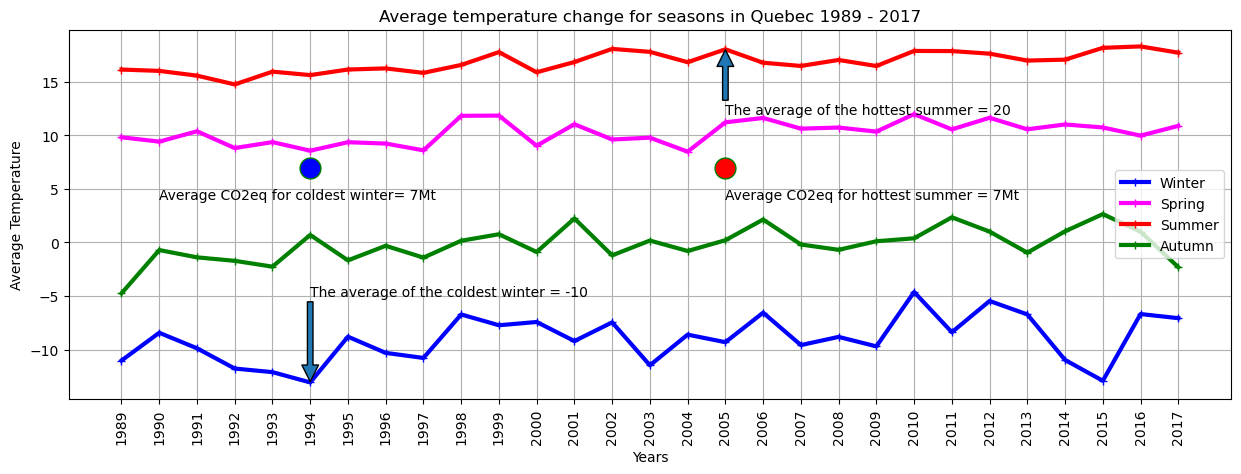

In [41]:
#locate the seasons for QC
QC_autumn_group = Prov_QC.loc[Prov_QC["Seasons"] == "Autumn"]
QC_spring_group = Prov_QC.loc[Prov_QC["Seasons"] == "Spring"]
QC_winter_group = Prov_QC.loc[Prov_QC["Seasons"] == "Winter"]
QC_summer_group = Prov_QC.loc[Prov_QC["Seasons"] == "Summer"]


#QC line grapgh 
x_QC_w = [5]
y_QC_w = [7]
x_QC_s = [16]
y_QC_s = [7]
plt.figure().set_figwidth(15)
plt.annotate('The average of the coldest winter = -10',xy=(5,-13),xytext=(5,-5),arrowprops={})
plt.annotate('The average of the hottest summer = 20',xy=(16,18),xytext=(16,12),arrowprops={})
QC_winter = plt.plot(QC_winter_group["Year"],QC_winter_group ["Average Temperature_mean"] , marker="+",color="blue", linewidth=3, label = "Winter" )
QC_spring = plt.plot(QC_spring_group["Year"],QC_spring_group ["Average Temperature_mean"] , marker="+",color="magenta", linewidth=3, label = "Spring")
QC_summer = plt.plot(QC_summer_group["Year"],QC_summer_group ["Average Temperature_mean"] , marker="+",color="red", linewidth=3, label = "Summer")
QC_autumn = plt.plot(QC_autumn_group["Year"],QC_autumn_group ["Average Temperature_mean"] , marker="+",color="green", linewidth=3, label = "Autumn")
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title("Average temperature change for seasons in Quebec 1989 - 2017")
plt.xticks(rotation=90)
plt.legend(loc = 0)
plt.grid()
plt.plot(x_QC_w, y_QC_w, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="blue")
plt.plot(x_QC_s, y_QC_s, marker="o", markersize=15, markeredgecolor="green", markerfacecolor="red")
plt.text(1,4,'Average CO2eq for coldest winter= 7Mt')
plt.text(16,4,'Average CO2eq for hottest summer = 7Mt')
plt.show()

In [20]:
# save summary_stats to Excel file
summary_stats.to_excel('summary_stats.xlsx', index=False)

In [21]:
Gas_df = pd.read_excel('Resources/provices_result.xlsx')
Gas_df.tail()

,Year,Region,Index,Source,Category,Sub-category,Sub-sub-category,Total,CO2eq,Unit
17135,2020,Yukon,42,Waste,Wastewater,NaN,NaN,False,0.01,Mt
17136,2020,Yukon,45,"Light Manufacturing, Construction and Forest R...",NaN,NaN,NaN,True,0.02,Mt
17137,2020,Yukon,46,"Light Manufacturing, Construction and Forest R...",Light Manufacturing,NaN,NaN,False,0.02,Mt
17138,2020,Yukon,47,"Light Manufacturing, Construction and Forest R...",Construction,NaN,NaN,False,0.00,Mt
17139,2020,Yukon,48,"Light Manufacturing, Construction and Forest R...",Forest Resources,NaN,NaN,False,0.00,Mt


In [22]:
Gas_df['CO2eq'] = pd.to_numeric(Gas_df['CO2eq'], errors='coerce')
print(Gas_df.dtypes)

Year                  int64
Region               object
Index                 int64
Source               object
Category             object
Sub-category         object
Sub-sub-category     object
Total                  bool
CO2eq               float64
Unit                 object
dtype: object


In [23]:
Gas_Gas_df = Gas_df.groupby("Region")
Gas_Gas_df.head()

,Year,Region,Index,Source,Category,Sub-category,Sub-sub-category,Total,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,NaN,NaN,NaN,True,165.65,Mt
1,1990,Alberta,1,Oil and Gas,NaN,NaN,NaN,True,61.96,Mt
2,1990,Alberta,2,Oil and Gas,Upstream Oil and Gas,NaN,NaN,True,58.36,Mt
3,1990,Alberta,3,Oil and Gas,Upstream Oil and Gas,Natural Gas Production and Processing,NaN,False,23.94,Mt
4,1990,Alberta,4,Oil and Gas,Upstream Oil and Gas,Conventional Oil Production,NaN,True,15.49,Mt
...,...,...,...,...,...,...,...,...,...,...
5162,1999,Nunavut,0,Territorial Inventory Total,NaN,NaN,NaN,True,0.41,Mt
5163,1999,Nunavut,16,Electricity,NaN,NaN,NaN,False,0.02,Mt
5164,1999,Nunavut,17,Transport,NaN,NaN,NaN,True,0.27,Mt
5165,1999,Nunavut,18,Transport,Passenger Transport,NaN,NaN,True,0.10,Mt


In [24]:
Gas_av_df = Gas_df["CO2eq"].mean()
Gas_av_df

8.650983337244778

In [ ]:
#coldest winter AB = -12 in 1996 
#hottest summer AB  = 16 in  2012

#coldest winter ON = -10 in 2015 
#hottest summer ON  = 20 in 2016 

#coldest winter QC = -10 in 1994
#hottest summer QC  = 20 in 2005

In [30]:
# locate the years of both hotteset summer and coldest winter for each province. 
#AB 
Gas_1996_winter = Gas_df.loc[Gas_df['Year'] == 1996 ]
Gas_2012_summer = Gas_df.loc[Gas_df['Year'] == 2012 ]

#ON

Gas_2015_winter = Gas_df.loc[Gas_df['Year'] == 2015 ]
Gas_2016_summer = Gas_df.loc[Gas_df['Year'] == 2016 ]

#QC
Gas_1994_winter = Gas_df.loc[Gas_df['Year'] == 1994 ]
Gas_2005_summer = Gas_df.loc[Gas_df['Year'] == 2005 ]


,Year,Region,Index,Source,Category,Sub-category,Sub-sub-category,Total,CO2eq,Unit
13811,2015,Alberta,0,Provincial Inventory Total,NaN,NaN,NaN,True,284.29,Mt
13812,2015,Alberta,1,Oil and Gas,NaN,NaN,NaN,True,141.55,Mt
13813,2015,Alberta,2,Oil and Gas,Upstream Oil and Gas,NaN,NaN,True,136.56,Mt
13814,2015,Alberta,3,Oil and Gas,Upstream Oil and Gas,Natural Gas Production and Processing,NaN,False,45.73,Mt
13815,2015,Alberta,4,Oil and Gas,Upstream Oil and Gas,Conventional Oil Production,NaN,True,16.74,Mt


In [28]:

#locate gas values for AB for years of both both hotteset summer and coldest winter
Gas_1996_AB_w = Gas_1996_winter.loc[Gas_1996_winter['Region'] == "Alberta" ]
Gas_2012_AB_s = Gas_2012_summer.loc[Gas_2012_summer['Region'] == "Alberta" ]

#locate gas values for ON for years of both both hotteset summer and coldest winter

Gas_2015_ON_w = Gas_2015_winter.loc[Gas_2015_winter ['Region'] == "Ontario" ]
Gas_2016_ON_s = Gas_2016_summer.loc[Gas_2016_summer['Region'] == "Ontario" ]

#locate gas values for QC for years of both both hotteset summer and coldest winter 

Gas_1994_QC_w = Gas_1994_winter.loc[Gas_1994_winter['Region'] == "Quebec" ]
Gas_2005_QC_s = Gas_2005_summer.loc[Gas_2005_summer['Region'] == "Quebec" ]


,Year,Region,Index,Source,Category,Sub-category,Sub-sub-category,Total,CO2eq,Unit
8659,2005,Quebec,0,Provincial Inventory Total,NaN,NaN,NaN,True,86.34,Mt
8660,2005,Quebec,1,Oil and Gas,NaN,NaN,NaN,True,4.37,Mt
8661,2005,Quebec,2,Oil and Gas,Upstream Oil and Gas,NaN,NaN,True,0.32,Mt
8662,2005,Quebec,12,Oil and Gas,Upstream Oil and Gas,"Oil, Natural Gas and CO2 Transmission",NaN,False,0.32,Mt
8663,2005,Quebec,13,Oil and Gas,Downstream Oil and Gas,NaN,NaN,True,4.05,Mt
8664,2005,Quebec,14,Oil and Gas,Downstream Oil and Gas,Petroleum Refining,NaN,False,3.95,Mt
8665,2005,Quebec,15,Oil and Gas,Downstream Oil and Gas,Natural Gas Distribution,NaN,False,0.10,Mt
8666,2005,Quebec,16,Electricity,NaN,NaN,NaN,False,0.65,Mt
8667,2005,Quebec,17,Transport,NaN,NaN,NaN,True,30.85,Mt
8668,2005,Quebec,18,Transport,Passenger Transport,NaN,NaN,True,19.32,Mt


In [31]:
#Getting the average gas for both coldest winter AB = -12 in 1996 and hottest summer AB  = 16 in  2012
Gas_AB_average_1996_w = Gas_1996_AB_w["CO2eq"].mean()
Gas_AB_average_1996_w

14.247708333333335

In [32]:
Gas_AB_average_2012_s = Gas_2012_AB_s["CO2eq"].mean()
Gas_AB_average_2012_s 

21.188541666666666

In [33]:
#Getting the average of both coldest winter ON = -10 in 2015 and hottest summer ON  = 20 in 2016 
Gas_ON_average_2015_w = Gas_2015_ON_w["CO2eq"].mean()
Gas_ON_average_2015_w

13.018809523809526

In [34]:
Gas_ON_average_2016_s = Gas_2016_ON_s["CO2eq"].mean()
Gas_ON_average_2016_s

12.937142857142858

In [35]:
#Getting the average of both coldest winter QC = -10 in 1994 and hottest summer QC  = 20 in 2005
Gas_QC_average_1994_w = Gas_1994_QC_w["CO2eq"].mean()
Gas_QC_average_1994_w

7.0492307692307685

In [36]:
Gas_QC_average_2005_s = Gas_2005_QC_s ["CO2eq"].mean()
Gas_QC_average_2005_s 

7.481538461538461